# Simple Linear Regression
Simple linear regression is a statistical technique used to establish a relationship between two variables - one independent and one dependent. The purpose of this technique is to determine whether there is a linear relationship between the two variables, and if so, to develop a mathematical model that can be used to predict the value of the dependent variable based on the value of the independent variable.

In simple linear regression, the independent variable is also known as the predictor variable, and the dependent variable is known as the response variable. The relationship between the two variables is represented by a straight line, which is determined by the values of the slope and the intercept of the line. The slope represents the change in the response variable for each unit change in the predictor variable, while the intercept represents the value of the response variable when the predictor variable is zero.

The process of simple linear regression involves fitting a line to a set of data points that represent the values of the predictor and response variables. This line is then used to make predictions about the response variable based on new values of the predictor variable. The accuracy of the model can be evaluated by measuring the degree of variation between the predicted values and the actual values of the response variable.

Simple linear regression is widely used in various fields, including economics, social sciences, engineering, and business. It is a powerful tool for understanding the relationship between two variables and making predictions based on that relationship.

## 01. Importing the Essential Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

## 02. Creating a DataFrame

In [2]:
# Reading Housing.csv using pandas
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
# Selcting only two columns (area, price) from the dataframe
df = df[["area", "price"]]
df.head()

,area,price
0,7420,13300000
1,8960,12250000
2,9960,12250000
3,7500,12215000
4,7420,11410000


In [4]:
# Print the shape of the dataframe
df.shape

(545, 2)

## 03. Creating a Scatter Plot between Area and Price

Text(0, 0.5, 'Price(US$)')

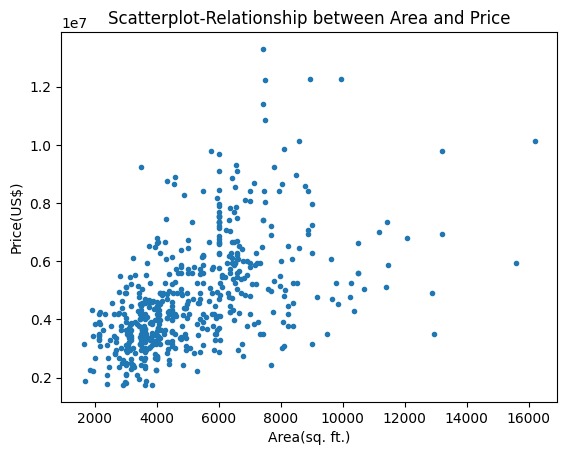

In [5]:
plt.scatter(df["area"], df["price"], marker=".")
plt.title("Scatterplot-Relationship between Area and Price")
plt.xlabel("Area(sq. ft.)")
plt.ylabel("Price(US$)")

## 04. Creating Linear Regression Object

In [6]:
# Defining independent(x) and dependent(y) variable
# In this case, independent variable(x) will be 'area'
# and dependent variable will be 'price'
x = df[["area"]].values
y = df[["price"]].values

In [7]:
# Creating a Linear Regression model
reg = linear_model.LinearRegression()
# Training the model using the x and y
reg.fit(x, y)

LinearRegression()

## 05. Predicting Prices of Random House Areas

In [8]:
reg.predict([[5000]])

array([[4697182.95376035]])

In [9]:
reg.predict([[10000]])

array([[7007057.42512426]])

## 06. Getting the Coefficients
Linear Equation:<br>
**y = mx + c**<br>
where, 
* y = dependent variable
* m = slope
* x = independent variable
* c = y-intercept

In [10]:
# Getting the slope(m)
m = reg.coef_
m

array([[461.97489427]])

In [11]:
# Getting the y-intercept(c)
c = reg.intercept_
c

array([2387308.48239643])

## 07. Verifying the Result

In [12]:
# If the 'area of the house'(x) is 5000 sq.ft. then the 'price of the house'(y) will be:
house_price1 = m * 5000 + c
house_price1

array([[4697182.95376035]])

In [13]:
# If the 'area of the house'(x) is 10000 sq.ft. then the 'price of the house'(y) will be:
house_price2 = m * 10000 + c
house_price2

array([[7007057.42512426]])

## 08. Predicting the Price of Houses using DataFrame

In [14]:
list_of_areas = [5000, 6000, 7000, 8000, 9000, 10000]
# Creating a pandas dataframe from the list
df_areas = pd.DataFrame({"area": list_of_areas})
df_areas

,area
0,5000
1,6000
2,7000
3,8000
4,9000
5,10000


In [15]:
# Predicting the price of house areas using the Linear Regression model
predicted_prices = reg.predict(df_areas.values)
predicted_prices

array([[4697182.95376035],
       [5159157.84803313],
       [5621132.74230591],
       [6083107.6365787 ],
       [6545082.53085148],
       [7007057.42512426]])

In [16]:
# Append the predicted prices of houses to the dataframe
df_areas["price"] = predicted_prices
df_areas

,area,price
0,5000,4.697183e+06
1,6000,5.159158e+06
2,7000,5.621133e+06
3,8000,6.083108e+06
4,9000,6.545083e+06
5,10000,7.007057e+06


## 09. Exporting the DataFrame

In [17]:
df_areas.to_csv("Predicted_House_Prices.csv", index=False)

## 10. Plotting the Scatterplot with the Regression Line

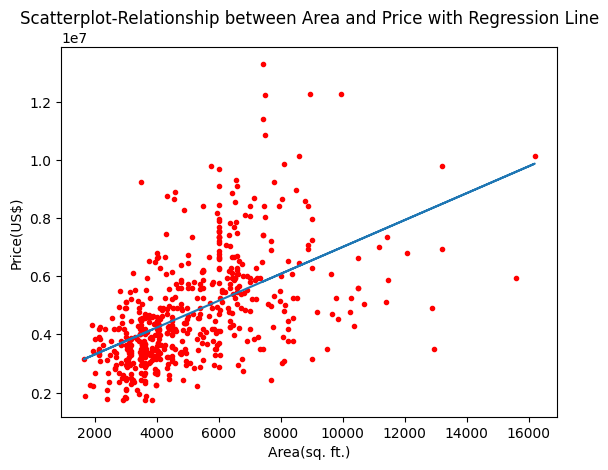

In [18]:
plt.scatter(df["area"], df["price"], marker=".", color="red")
plt.title("Scatterplot-Relationship between Area and Price with Regression Line")
plt.xlabel("Area(sq. ft.)")
plt.ylabel("Price(US$)")
plt.plot(df[["area"]].values, reg.predict(df[["area"]].values))